Dashboard for this dataset - Northwind

https://public.tableau.com/profile/bartekkrol#!/

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns', 150)

In [2]:
customers = pd.read_excel('D:/Python and Pandas/Git Project/Northwind for GiT/Customers.xlsx')
employees = pd.read_excel('D:/Python and Pandas/Git Project/Northwind for GiT/Employees.xlsx')
orderDetails = pd.read_excel('D:/Python and Pandas/Git Project/Northwind for GiT/Order_Details.xlsx')
orders = pd.read_excel('D:/Python and Pandas/Git Project/Northwind for GiT/Orders.xlsx')
products = pd.read_excel('D:/Python and Pandas/Git Project/Northwind for GiT/Products.xlsx')

## Merging DataFrames

In [3]:
orderDetail_products = orderDetails.merge(products, on='ProductID', how='left')

In [4]:
orderDetail_orders = orderDetails.merge(orders, on='OrderID', how='left')

In [5]:
orderDetail_orders_customers = orderDetail_orders.merge(customers, on='CustomerID', how='left')

## Sales by months

In [6]:
orderDetail_orders.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,CustomerID,EmployeeID,OrderDate,ShipCity,ShipCountry
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany


In [7]:
orderDetail_orders['Price'] = orderDetail_orders['UnitPrice'] * orderDetail_orders['Quantity']

In [8]:
if orderDetail_orders['Discount'].any()>0:
     orderDetail_orders['DiscountedPrice'] = (orderDetail_orders['Price'] - (orderDetail_orders['Price']*orderDetail_orders['Discount']))
else: 
    print(orderDetail_orders['Price'])

In [9]:
orderDetail_orders.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,CustomerID,EmployeeID,OrderDate,ShipCity,ShipCountry,Price,DiscountedPrice
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,168.0,168.0
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,98.0,98.0
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,174.0,174.0
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany,167.4,167.4
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany,1696.0,1696.0


In [10]:
# taking year, month from 'Order Date'
orderDetail_orders['Year_Month'] = orderDetail_orders['OrderDate'].str[0:7]

In [11]:
orderDetail_orders.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,CustomerID,EmployeeID,OrderDate,ShipCity,ShipCountry,Price,DiscountedPrice,Year_Month
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,168.0,168.0,1996-07
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,98.0,98.0,1996-07
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,174.0,174.0,1996-07
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany,167.4,167.4,1996-07
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany,1696.0,1696.0,1996-07


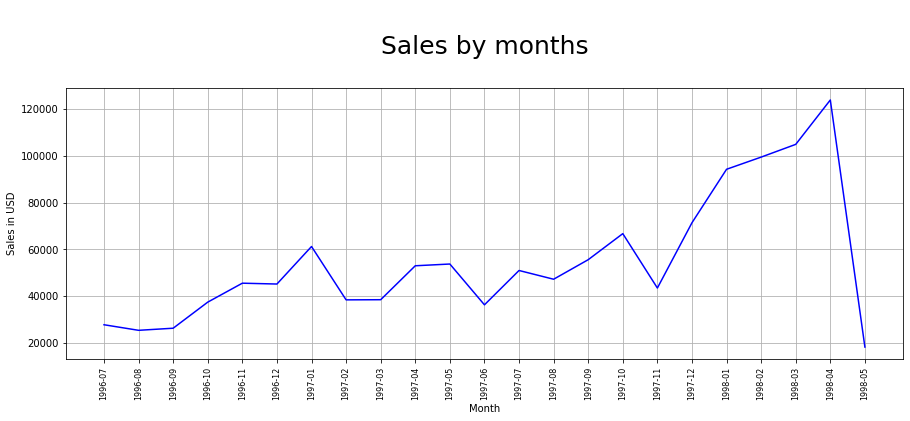

In [12]:
months_sum = orderDetail_orders.groupby('Year_Month').sum()
months = [month for month, orderDetail_orders in orderDetail_orders.groupby('Year_Month')]
plt.figure(figsize=(15,5))
plt.plot(months,months_sum['DiscountedPrice'], color = 'blue')
plt.xticks(months, rotation='vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('Month')
plt.title("\n Sales by months \n", size=25)
plt.grid()
plt.show()

## Month over Month

In [13]:
MoM_Data = pd.DataFrame(months_sum['DiscountedPrice'])
MoM_Data

,DiscountedPrice
Year_Month,
1996-07,27861.8950
1996-08,25485.2750
1996-09,26381.4000
1996-10,37515.7250
1996-11,45600.0450
1996-12,45239.6300
1997-01,61258.0700
1997-02,38483.6350
1997-03,38547.2200


In [14]:
# To calculate MoM i need value of 1996-06 (DataFrame is from 1996-07) 
# taking value from Sales 1998-05 = 18333.6305 and roll to first index of 'Last_Month'
MoM_Data['Last_Month'] = np.roll(MoM_Data['DiscountedPrice'],1)

In [15]:
# display only first and last index
MoM_Data.iloc[[0,-1]]

,DiscountedPrice,Last_Month
Year_Month,,
1996-07,27861.8950,18333.6305
1998-05,18333.6305,123798.6825


In [16]:
# and in the end i need to drop value of first index (1996-07)
MoM_Data = MoM_Data.drop(MoM_Data.index[0])
MoM_Data.head()

,DiscountedPrice,Last_Month
Year_Month,,
1996-08,25485.275,27861.895
1996-09,26381.400,25485.275
1996-10,37515.725,26381.400
1996-11,45600.045,37515.725
1996-12,45239.630,45600.045


In [17]:
# calculating MoM changing for each month
MoM_Data['% Change'] = (MoM_Data['DiscountedPrice']/MoM_Data['Last_Month'])-1
MoM_Data

,DiscountedPrice,Last_Month,% Change
Year_Month,,,
1996-08,25485.2750,27861.8950,-0.085300
1996-09,26381.4000,25485.2750,0.035162
1996-10,37515.7250,26381.4000,0.422052
1996-11,45600.0450,37515.7250,0.215492
1996-12,45239.6300,45600.0450,-0.007904
1997-01,61258.0700,45239.6300,0.354080
1997-02,38483.6350,61258.0700,-0.371779
1997-03,38547.2200,38483.6350,0.001652
1997-04,53032.9525,38547.2200,0.375792


In [18]:
##Plotting MoM Changing
MoM_Data.reset_index(inplace=True)
results_months = MoM_Data[['% Change','Year_Month']]

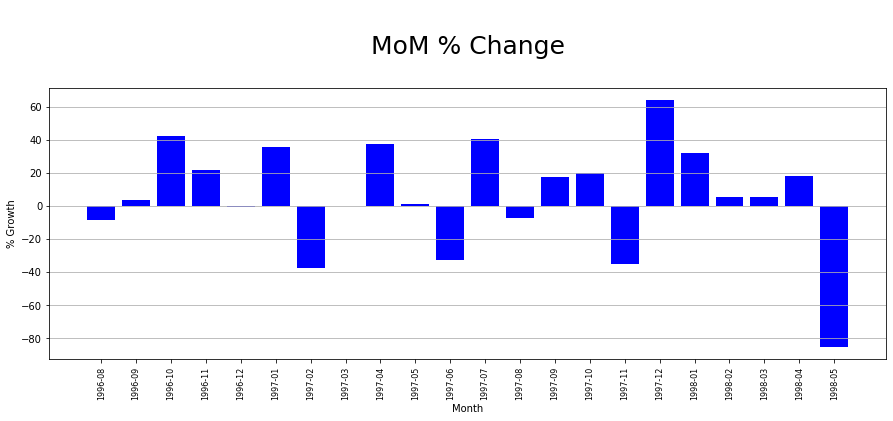

In [19]:
plt.figure(figsize=(15,5))
plt.bar(results_months['Year_Month'],results_months['% Change']*100, color = 'blue')
plt.xticks(results_months['Year_Month'], rotation='vertical', size = 8)
plt.ylabel('% Growth')
plt.xlabel('Month')
plt.title("\n MoM % Change \n", size=25)
plt.grid(axis='y')
plt.show()

## Which of customers had the biggest sales

In [20]:
# merging orderDetail_orders and customers
orderDetail_orders_customers = orderDetail_orders.merge(customers, on='CustomerID', how='left')

In [21]:
customerID = orderDetail_orders_customers.groupby(['CustomerID', 'CompanyName', 'ShipCountry', 'ShipCity']).sum()

In [22]:
customerID.reset_index(inplace=True)

In [23]:
top10_max_Sale = customerID[['CustomerID', 'CompanyName', 'ShipCountry', 'ShipCity','DiscountedPrice']].sort_values('DiscountedPrice',ascending=False).head(10)

In [24]:
orderDetail_orders_customers.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,CustomerID,EmployeeID,OrderDate,ShipCity,ShipCountry,Price,DiscountedPrice,Year_Month,CompanyName
0,10248,11,14.0,12,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,168.0,168.0,1996-07,Vins et alcools Chevalier
1,10248,42,9.8,10,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,98.0,98.0,1996-07,Vins et alcools Chevalier
2,10248,72,34.8,5,0.0,VINET,5,1996-07-04 00:00:00.000,Reims,France,174.0,174.0,1996-07,Vins et alcools Chevalier
3,10249,14,18.6,9,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany,167.4,167.4,1996-07,Toms Spezialitäten
4,10249,51,42.4,40,0.0,TOMSP,6,1996-07-05 00:00:00.000,Münster,Germany,1696.0,1696.0,1996-07,Toms Spezialitäten


In [25]:
top10_max_Sale

,CustomerID,CompanyName,ShipCountry,ShipCity,DiscountedPrice
60,QUICK,QUICK-Stop,Germany,Cunewalde,110277.3050
19,ERNSH,Ernst Handel,Austria,Graz,104874.9785
68,SAVEA,Save-a-lot Markets,USA,Boise,104361.9500
62,RATTC,Rattlesnake Canyon Grocery,USA,Albuquerque,51097.8005
35,HUNGO,Hungry Owl All-Night Grocers,Ireland,Cork,49979.9050
32,HANAR,Hanari Carnes,Brazil,Rio de Janeiro,32841.3700
37,KOENE,Königlich Essen,Germany,Brandenburg,30908.3840
22,FOLKO,Folk och fä HB,Sweden,Bräcke,29567.5625
49,MEREP,Mère Paillarde,Canada,Montréal,28872.1900
86,WHITC,White Clover Markets,USA,Seattle,27363.6050


## Which of customers had the smallest sales

In [26]:
top10_min_Sale = customerID[['CustomerID', 'CompanyName', 'ShipCountry', 'ShipCity','DiscountedPrice']].sort_values('DiscountedPrice').head(10)

In [27]:
top10_min_Sale

,CustomerID,CompanyName,ShipCountry,ShipCity,DiscountedPrice
12,CENTC,Centro comercial Moctezuma,Mexico,México D.F.,100.80
41,LAZYK,Lazy K Kountry Store,USA,Walla Walla,357.00
40,LAUGB,Laughing Bacchus Wine Cellars,Canada,Vancouver,522.50
51,NORTS,North/South,UK,London,649.00
27,GALED,Galería del gastrónomo,Spain,Barcelona,836.70
1,ANATR,Ana Trujillo Emparedados y helados,Mexico,México D.F.,1402.95
66,ROMEY,Romero y tomillo,Spain,Madrid,1467.29
82,VINET,Vins et alcools Chevalier,France,Reims,1480.00
31,GROSR,GROSELLA-Restaurante,Venezuela,Caracas,1488.70
25,FRANS,Franchi S.p.A.,Italy,Torino,1545.70


## Top 10 customers with the biggest discount

In [28]:
customerID['Discount$'] = customerID['Price'] - customerID['DiscountedPrice']

In [29]:
customerID.head()

,CustomerID,CompanyName,ShipCountry,ShipCity,OrderID,ProductID,UnitPrice,Quantity,Discount,EmployeeID,Price,DiscountedPrice,Discount$
0,ALFKI,Alfreds Futterkiste,Germany,Berlin,129621,554,320.85,174,1.05,40,4596.20,4273.0000,323.2000
1,ANATR,Ana Trujillo Emparedados y helados,Mexico,México D.F.,106954,402,215.05,63,0.00,42,1402.95,1402.9500,0.0000
2,ANTON,Antonio Moreno Taquería,Mexico,México D.F.,180350,650,369.23,359,1.00,71,7515.35,7023.9775,491.3725
3,AROUT,Around the Horn,UK,Colchester,320404,1371,575.30,650,0.70,126,13806.50,13390.6500,415.8500
4,BERGS,Berglunds snabbköp,Sweden,Luleå,552534,2029,1425.65,1001,3.00,217,26968.15,24927.5775,2040.5725


In [30]:
top10_Discount = customerID[['CustomerID', 'CompanyName', 'ShipCountry', 'ShipCity','Discount$']].sort_values('Discount$',ascending=False).head(10)

In [31]:
top10_Discount

,CustomerID,CompanyName,ShipCountry,ShipCity,Discount$
68,SAVEA,Save-a-lot Markets,USA,Boise,11311.4400
19,ERNSH,Ernst Handel,Austria,Graz,8361.7015
35,HUNGO,Hungry Owl All-Night Grocers,Ireland,Cork,7337.4850
60,QUICK,QUICK-Stop,Germany,Cunewalde,7206.0850
59,QUEEN,Queen Cozinha,Brazil,Sao Paulo,4508.6025
49,MEREP,Mère Paillarde,Canada,Montréal,3331.7100
56,PICCO,Piccolo und mehr,Austria,Salzburg,3131.0900
22,FOLKO,Folk och fä HB,Sweden,Bräcke,2987.9875
23,FRANK,Frankenversand,Germany,München,2066.1505
4,BERGS,Berglunds snabbköp,Sweden,Luleå,2040.5725


## Top 10 products by Price

In [32]:
orderDetail_orders_products = orderDetail_orders.merge(products, on='ProductID', how='left')

In [33]:
product = orderDetail_orders_products[['ProductName', 'Quantity', 'DiscountedPrice']]

In [34]:
productID = product.groupby('ProductName').sum()

In [35]:
productID.reset_index(inplace=True)

In [36]:
top10_products = productID[['ProductName','DiscountedPrice']].sort_values('DiscountedPrice',ascending=False).head(10)

In [37]:
top10_products

,ProductName,DiscountedPrice
11,Côte de Blaye,141396.735
68,Thüringer Rostbratwurst,80368.672
51,Raclette Courdavault,71155.700
66,Tarte au sucre,47234.970
3,Camembert Pierrot,46825.480
17,Gnocchi di nonna Alice,42593.060
36,Manjimup Dried Apples,41819.650
0,Alice Mutton,32698.380
4,Carnarvon Tigers,29171.875
56,Rössle Sauerkraut,25696.640


## Top 10 products by Quantity

In [38]:
top10_products_quantity = productID[['ProductName','Quantity']].sort_values('Quantity',ascending=False).head(10)

In [39]:
top10_products_quantity

,ProductName,Quantity
3,Camembert Pierrot,1577
51,Raclette Courdavault,1496
18,Gorgonzola Telino,1397
17,Gnocchi di nonna Alice,1263
46,Pavlova,1158
53,Rhönbräu Klosterbier,1155
21,Guaraná Fantástica,1125
2,Boston Crab Meat,1103
66,Tarte au sucre,1083
6,Chang,1057


## Top employee with the biggest sales

In [40]:
orderDetail_orders_employees = orderDetail_orders.merge(employees, on='EmployeeID', how='left')

In [41]:
orderDetail_orders_employees['Name'] = orderDetail_orders_employees['FirstName'] + ' ' + orderDetail_orders_employees['LastName']

In [42]:
employee = orderDetail_orders_employees[['Name','Title','Quantity', 'DiscountedPrice']]

In [43]:
employeeID = employee.groupby(['Name','Title']).sum()

In [44]:
employeeID.reset_index(inplace=True)

In [45]:
top_employee_price = employeeID[['Title', 'Name','DiscountedPrice']].sort_values('DiscountedPrice',ascending=False).head(10)

In [46]:
top_employee_price

,Title,Name,DiscountedPrice
4,Sales Representative,Margaret Peacock,232890.8460
2,Sales Representative,Janet Leverling,202812.8430
6,Sales Representative,Nancy Davolio,192107.6045
0,"Vice President, Sales",Andrew Fuller,166537.7550
3,Inside Sales Coordinator,Laura Callahan,126862.2775
7,Sales Representative,Robert King,124568.2350
1,Sales Representative,Anne Dodsworth,77308.0665
5,Sales Representative,Michael Suyama,73913.1295
8,Sales Manager,Steven Buchanan,68792.2825


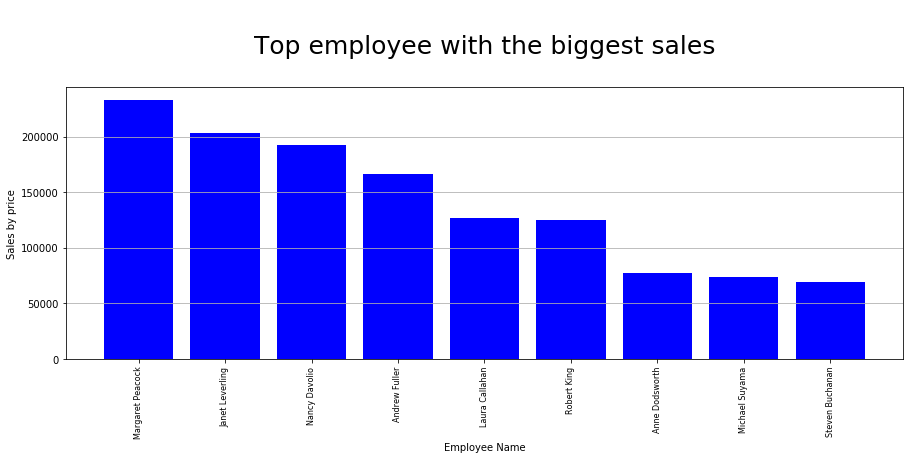

In [47]:
plt.figure(figsize=(15,5))
plt.bar(top_employee_price['Name'],top_employee_price['DiscountedPrice'], color = 'blue')
plt.xticks(top_employee_price['Name'], rotation='vertical', size = 8)
plt.ylabel('Sales by price')
plt.xlabel('Employee Name')
plt.title("\n Top employee with the biggest sales \n", size=25)
plt.grid(axis='y')
plt.show()

## Top employees with smallest sales

In [48]:
top_employee_smallest_price = employeeID[['Title', 'Name','DiscountedPrice']].sort_values('DiscountedPrice')

In [49]:
top_employee_smallest_price

,Title,Name,DiscountedPrice
8,Sales Manager,Steven Buchanan,68792.2825
5,Sales Representative,Michael Suyama,73913.1295
1,Sales Representative,Anne Dodsworth,77308.0665
7,Sales Representative,Robert King,124568.2350
3,Inside Sales Coordinator,Laura Callahan,126862.2775
0,"Vice President, Sales",Andrew Fuller,166537.7550
6,Sales Representative,Nancy Davolio,192107.6045
2,Sales Representative,Janet Leverling,202812.8430
4,Sales Representative,Margaret Peacock,232890.8460


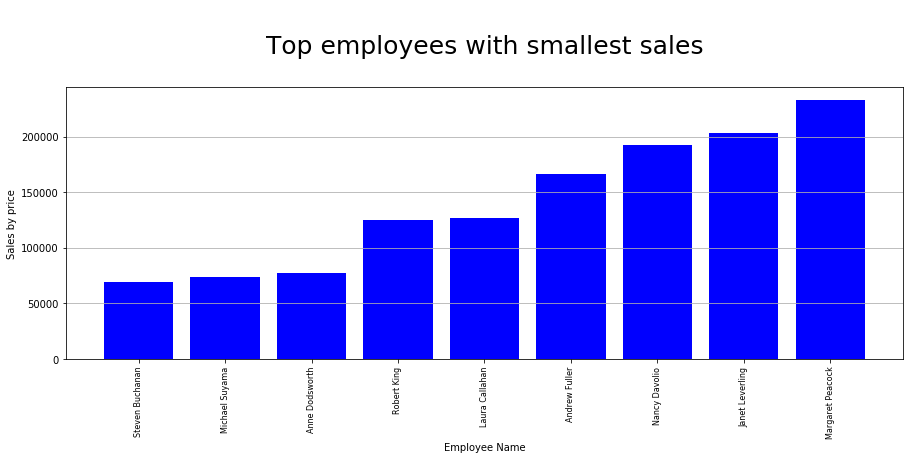

In [50]:
plt.figure(figsize=(15,5))
plt.bar(top_employee_smallest_price['Name'],top_employee_smallest_price['DiscountedPrice'], color = 'blue')
plt.xticks(top_employee_smallest_price['Name'], rotation='vertical', size = 8)
plt.ylabel('Sales by price')
plt.xlabel('Employee Name')
plt.title("\n Top employees with smallest sales \n", size=25)
plt.grid(axis='y')
plt.show()